In [1]:
import numpy as np
import pylab as plt

In [2]:
def zeroVelocityCj(k, mu1, mu2, mu3, Lx, N, size):
  # Calculando L3 e passo de integracao
  delta=size/float(N)
  L3=1.*((1-mu1-mu3)*(1-mu2)+mu2/2) + Lx*mu1*(1-mu2)

  # Criando os vetores x e y
  x = np.arange(-size/2.0, size/2.0, delta)
  y = np.arange(-size/2.0, size/2.0, delta)
  X, Y = np.meshgrid(x, y)

  # Calculando o CJ
  r1=np.sqrt((1-L3+X)**2+Y**2)
  r2=np.sqrt((Lx-L3+X)**2+Y**2)
  r3=np.sqrt((X-L3)**2+Y**2)
  m1=(1-mu2)*(1-mu1-mu3)
  m2=mu1*(1-mu2)
  m3=mu3*(1-mu2)
  z=(X**2+Y**2) + 2*k*(m1/r1 + m2/r2 + m3/r3) #+ mu2*np.log((r1+r3+1)/(r1+r3-1)))

  return [X, Y, z, L3, delta]

In [3]:
# assim se o interval for [2, 4] a função vai retornar [2, 2.1, 2.2, ... 3.9]
def getNumsFromInterval(interval, delta=0.1):
  begin, end = interval
  return np.arange(begin, end, delta)

In [4]:
def plotZeroVelocityCurves(k, mu1, mu2, mu3, Lx, N, size, CJ, cjDelta):
  cj = getNumsFromInterval(CJ, cjDelta)
  x, y, z, L3, delta = zeroVelocityCj(k, mu1, mu2, mu3, Lx, N, size)

  plt.figure()  

  # labels
  plt.title('Curva de Velocidade Zero')
  plt.xlabel('X')
  plt.ylabel('Y')

  # limits
  plt.xlim(-size/2.0,size/2.0)
  plt.ylim(-size/2.0,size/2.0)

  cb=plt.contour(x,y,z,levels=cj,extend='max', cmap='gray')

  plt.scatter([-1+L3,L3-Lx,L3],[0,0,0])

  label=["M1","M2","M3"]

  for i,x in enumerate([-1+L3,L3-Lx,L3]):
    plt.text(x+10*delta,-10*delta,label[i])

  plt.colorbar(cb)

  plt.show()

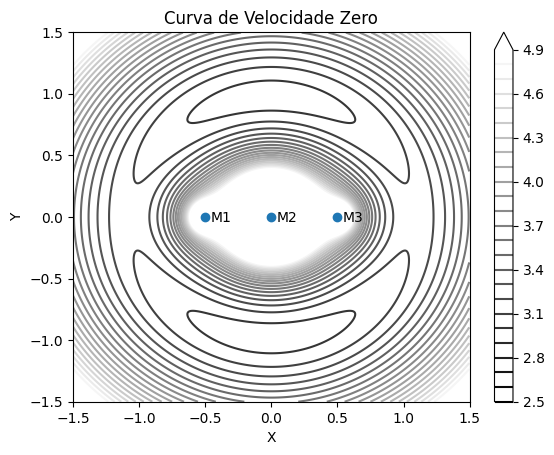

In [8]:
k = 1.
mu1=0.8 # mi
mu2=0. # mi_s
mu3=0.1 # mi_x
Lx= 0.5
N=800
size=3.0
CJ = [2.5, 5]
cjDelta = 0.1

plotZeroVelocityCurves(k, mu1, mu2, mu3, Lx, N, size, CJ, cjDelta)